In [ ]:
import os,librosa,numpy as np,matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
def train():
 global model,scaler,le
 p='C:/Users/hrith/Downloads/emotion_dataset'
 m={'01':'neutral','03':'happy','04':'sad','05':'angry'}
 f=[]
 l=[]
 for r,_,fs in os.walk(p):
  for file in fs:
   if file.endswith('.wav'):
    parts=file.split('-');e=parts[2]
    if e in m:
     y,s=librosa.load(os.path.join(r,file),sr=None)
     mf=librosa.feature.mfcc(y=y,sr=s,n_mfcc=13)
     mfm=np.mean(mf.T,axis=0)
     f.append(mfm);l.append(m[e])
 f=np.array(f);l=np.array(l)
 le=LabelEncoder()
 y=le.fit_transform(l)
 scaler=StandardScaler();x=scaler.fit_transform(f)
 xtr,xt,yt,ytt=train_test_split(x,y,test_size=0.2,random_state=42)
 model=LogisticRegression(max_iter=1000)
 model.fit(xtr,yt)
 yp=model.predict(xt)
 print("Accuracy:",accuracy_score(ytt,yp))
 print(classification_report(ytt,yp,target_names=le.classes_))
 cm=confusion_matrix(ytt,yp)
 plt.figure(figsize=(6,5))
 sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=le.classes_,yticklabels=le.classes_)
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.title('ConfusionMatrix')
 plt.tight_layout();plt.show()
def test_file(fp):
 y,s=librosa.load(fp,sr=None)
 mf=librosa.feature.mfcc(y=y,sr=s,n_mfcc=13)
 mfm=np.mean(mf.T,axis=0).reshape(1,-1)
 x=scaler.transform(mfm)
 pred=model.predict(x)
 print("Prediction:",le.inverse_transform(pred)[0])

Accuracy: 0.6222222222222222
              precision    recall  f1-score   support

       angry       0.83      0.83      0.83        47
       happy       0.53      0.56      0.55        32
     neutral       0.56      0.43      0.49        21
         sad       0.47      0.51      0.49        35

    accuracy                           0.62       135
   macro avg       0.60      0.58      0.59       135
weighted avg       0.62      0.62      0.62       135



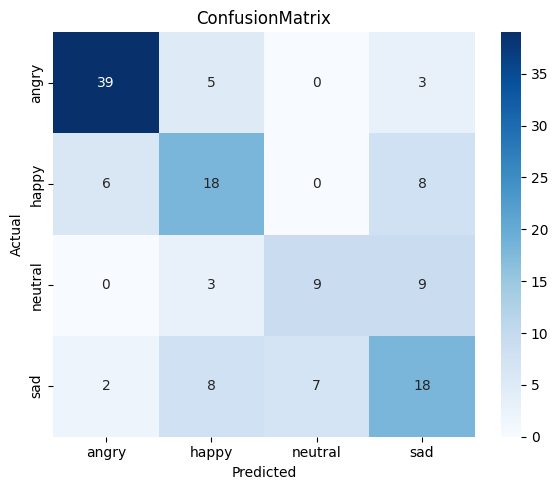

Prediction: angry


In [ ]:
train()
test_file("C:/Users/hrith/Downloads/ceeday-sound-effect-hd.wav")

Accuracy: 0.6222222222222222
              precision    recall  f1-score   support

       angry       0.83      0.83      0.83        47
       happy       0.53      0.56      0.55        32
     neutral       0.56      0.43      0.49        21
         sad       0.47      0.51      0.49        35

    accuracy                           0.62       135
   macro avg       0.60      0.58      0.59       135
weighted avg       0.62      0.62      0.62       135



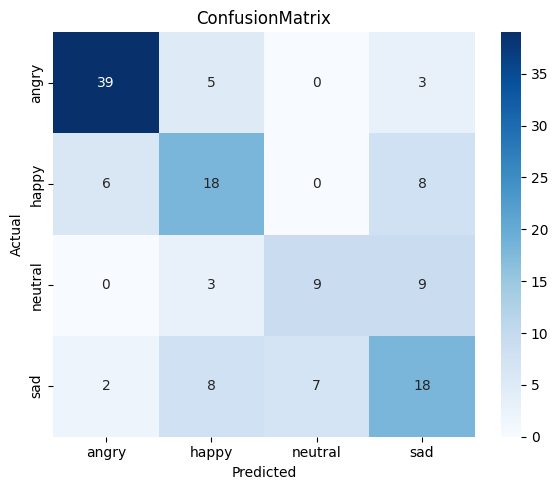

Prediction: angry


In [56]:
train()
test_file("C:/Users/hrith/Downloads/woo-yeah-baby-meme-memes-meme-classicmeme.wav")